# Lecture 4: Network visualization

In this lecture we will learn how to visualize a network, emphasizing different aspects of it.

NetworkX does not have strong visualization capabilities. It primarily relies upon an old, and hacked together drawing function written to utilize matplotlib. This means that matplotlib drawing is slow, non-interactive, and has many visual bugs. For example, arrows for directed graphs are particularly unpleasant.

Now there are several options to visualize a network, also utilizing wrappers for python.

For these reasons, I do not recommended that NetworkX be used as a primary tool for visualization of graphs. 

In general, I think it is a rare instance when visualizing a graph can provide meaningful information. While many graph visualizations are aesthetically pleasing, they do not convey information about the graph that could be more easily discovered by analyzing the graph using different metrics. Moreover, because positional layouts can be arbitrary, they may cause people to view structure when there is none. This is is epeciall true as graphs become larger than 100 nodes.

Regardless here are some things that illustrate the basics of graph drawing in NetworkX. We will also learn the basics of network visualization with [Cytoscape](https://cytoscape.org/), a much more pleasant tool for this.

There are many other options, like [GraphViz](https://graphviz.org/), [Gephi](https://gephi.org/)... that you can explore!

## Visualization with NetworkX

The basic function for visualizing a network is `nx.draw()`

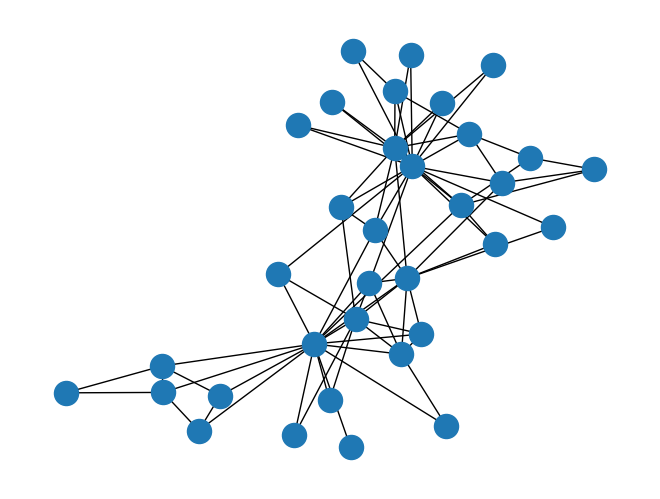

In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.karate_club_graph()
nx.draw(G)

The `nx.draw` has quite a lot of functionality. Let's take some time looking at its documentation

In [ ]:
nx.draw?

In [ ]:
nx.draw_networkx?

### Layouts

Graph Layouts are algorithms dedicated to node positioning for graph drawing. Usually we will plot networks in 2 dimensions, although many real networks have a high effective dimensionality. Therefore many times it is very difficult to arrange the nodes in 2D space in a way that we can observe specific characteristics of the network. In order to arrange the nodes automatically we have graph layout algorithms. 

The layouts can be stored into a variable that will contain the positions of all the nodes. You can see the different options for layouts [here](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) or by typing `nx.layout.[TAB]`. Let's check several layouts in with the network we just created.

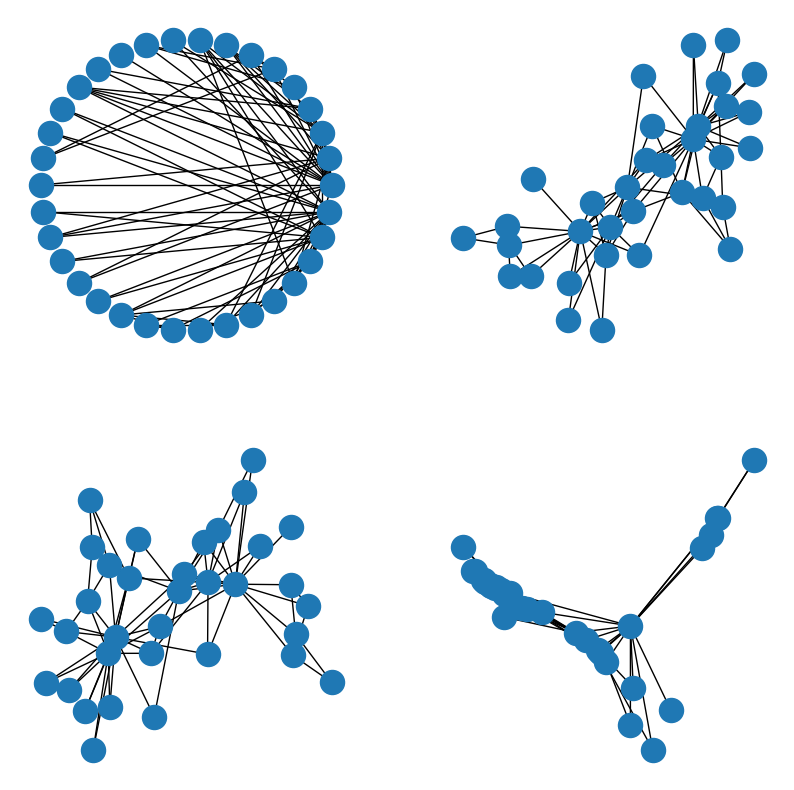

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(221)
circ_layout = nx.circular_layout(G)
nx.draw(G,pos=circ_layout)
plt.subplot(222)
fr_layout = nx.fruchterman_reingold_layout(G)
nx.draw(G,pos=fr_layout)
plt.subplot(223)
spr_layout = nx.spring_layout(G)
nx.draw(G,pos=spr_layout)
plt.subplot(224)
spec_layout = nx.spectral_layout(G)
nx.draw(G,pos=spec_layout)

In [20]:
print(type(circ_layout))
print(circ_layout)

<class 'dict'>
{0: array([1.00000000e+00, 1.25644979e-09]), 1: array([0.9829731 , 0.18374951]), 2: array([0.93247223, 0.36124167]), 3: array([0.8502171 , 0.52643216]), 4: array([0.7390089 , 0.67369563]), 5: array([0.60263467, 0.79801721]), 6: array([0.44573835, 0.8951633 ]), 7: array([0.27366298, 0.96182567]), 8: array([0.09226837, 0.99573416]), 9: array([-0.09226834,  0.99573416]), 10: array([-0.27366292,  0.96182567]), 11: array([-0.44573829,  0.8951633 ]), 12: array([-0.60263467,  0.79801721]), 13: array([-0.73900884,  0.67369574]), 14: array([-0.8502171 ,  0.52643216]), 15: array([-0.93247217,  0.36124179]), 16: array([-0.9829731 ,  0.18374953]), 17: array([-1.00000000e+00, -8.61663268e-08]), 18: array([-0.9829731 , -0.18374947]), 19: array([-0.93247223, -0.36124173]), 20: array([-0.85021716, -0.5264321 ]), 21: array([-0.7390089 , -0.67369562]), 22: array([-0.60263473, -0.79801714]), 23: array([-0.44573838, -0.8951633 ]), 24: array([-0.27366289, -0.96182567]), 25: array([-0.0922681

As you can see, the layout can make a big difference in identifying vissually certain characteristics of the network.

### Visualizing node properties

The basic plotting options that we can control in order to visualize node properties are

- Label.
- Color.
- Size.
- Shape.

#### Showing node labels

We can use the option `with_labels=True`, and the *name* of the nodes will be displayed inside the nodes. We can also give a list of labels to be displayed with the option `labels=label_dict`, where `label_dict` is a dictionary where the keys are the node names and the value is the label we want to use for each node. Also the font size and other properties can be changed.

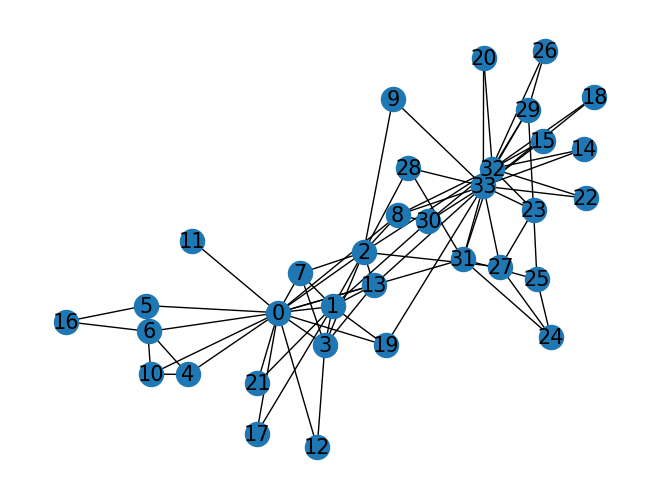

In [21]:
nx.draw(G,
        pos=fr_layout,
        with_labels=True,
        font_size=15) 

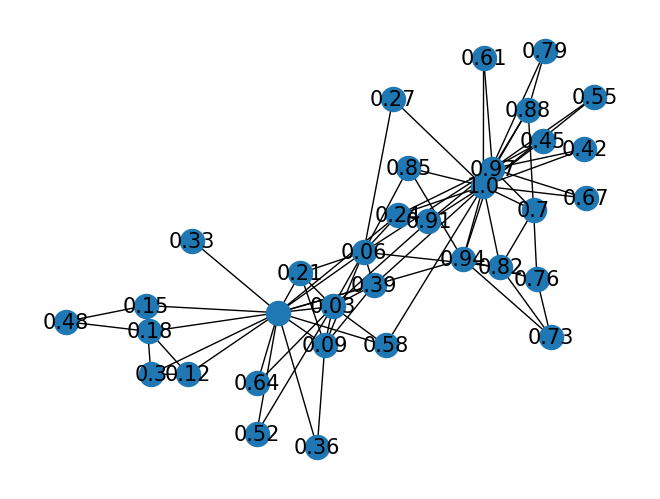

In [22]:
N = G.number_of_nodes()
label_dict = dict(zip(list(G.nodes()),np.round(np.linspace(0,1,N),2)))

del label_dict[0]

nx.draw(G,
        pos=fr_layout,
        with_labels=True,
        font_size=15,
        labels=label_dict) 

#### Node color

To change node colors we can use the option `node_color`. You can give a color, an array of colors (of length equal to the number of nodes and in the order in which they appear when you call the iterator `G.nodes()`) or an array of numbers. The array of numbers willbe converted to a color using the `cmap` that is specified (`viridis` is the default) and the options `vmin` and `vmax` that will set the boundaries for the colormap (maximum and minimum in the data is the default). You can find more colormaps and their names[here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

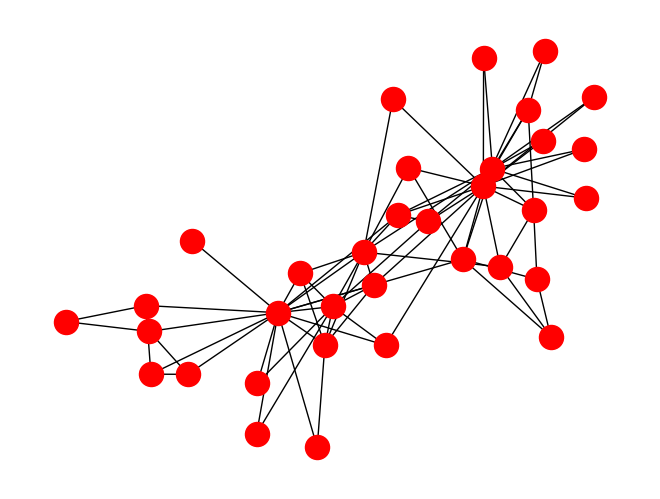

In [23]:
nx.draw(G,
        pos=fr_layout,
        node_color='r') 

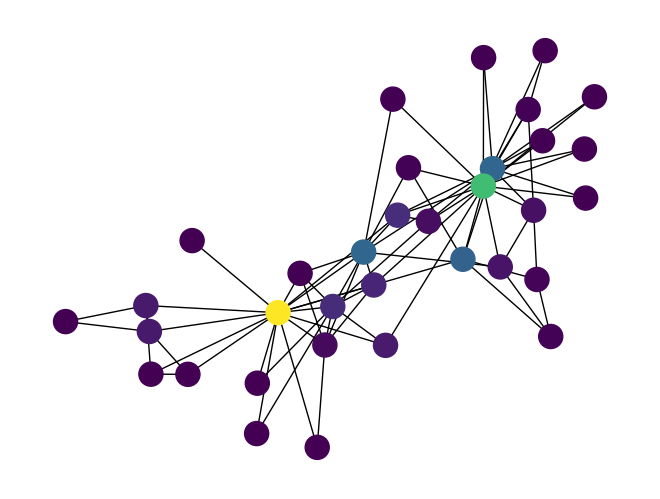

In [24]:
node_betweenness = [x for k,x in nx.betweenness_centrality(G).items()]
    
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness) 

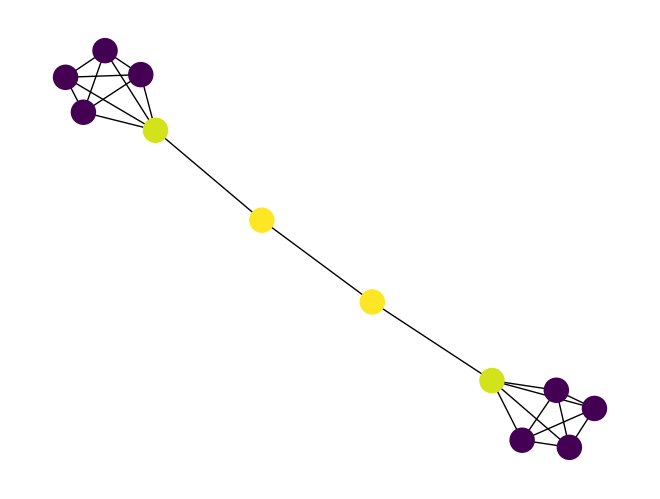

In [25]:
G2 = nx.barbell_graph(5,2)
node_betweenness2 = [x for k,x in nx.betweenness_centrality(G2).items()]
    
nx.draw(G2,
        pos=nx.fruchterman_reingold_layout(G2),
        node_color=node_betweenness2) 

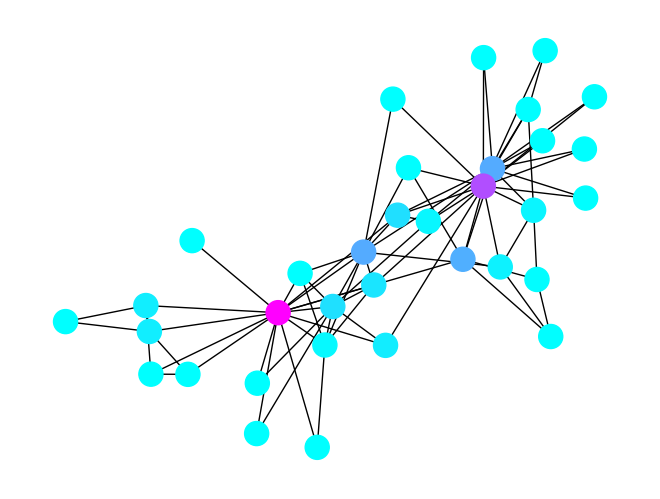

In [27]:
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        cmap='cool') 

#### Node size

Node size is controlled thruogh the parameter `node_size` works similarly to `node_color` in the sense that you can give a single number or a number for each of the nodes. Let's encode the degree of the node in its size.

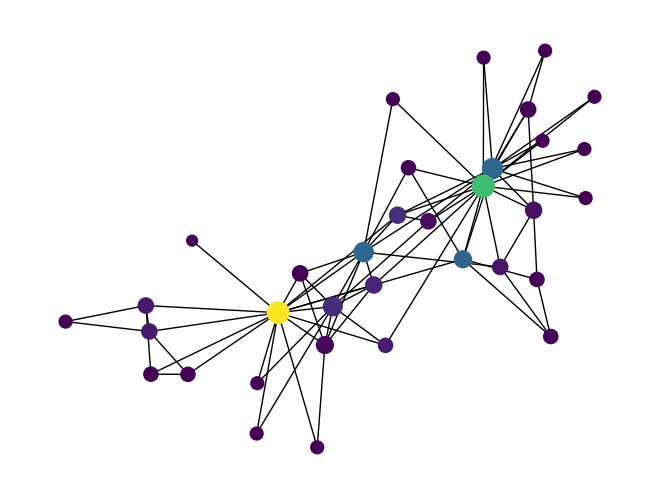

In [28]:
node_deg = np.array([k for x,k in dict(nx.degree(G)).items()])

nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        node_size=60*np.sqrt(node_deg)) 

#### Node shape

To change node shape you can use the parameter `node_shape`, which can take the values `so^>v<dph8*` Try them!

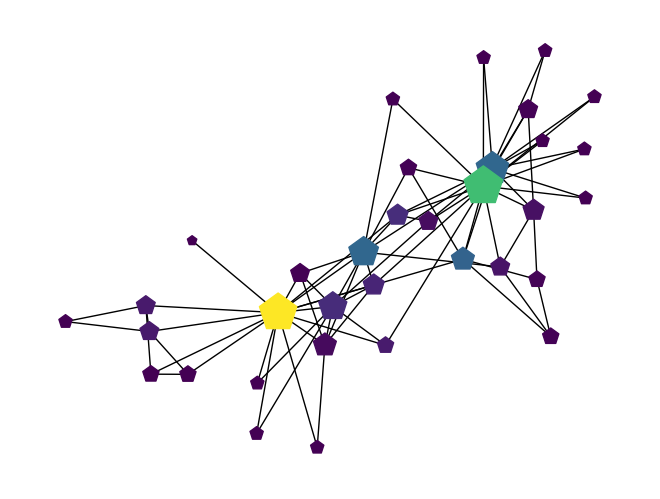

In [29]:
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        node_size=50*node_deg,
        node_shape='p') 

The problem with this is that you cannot decide a different shape for different nodes. To do this we will plot the nodes and the edges with different functions, `nx.draw_networkx_nodes()` and `nx.draw_networkx_edges()` respectively. 

In the function `nx.draw_networkx_nodes()` you can specify, through `nodelist`, the list of nodes that are going to be plotted.

##### Exercise

Plot the karate club network using different shapes for the nodes that belong to the club of `'Mr. Hi'` and to the club of `'Officer'`. You have to keep the node size proportional to the degree and the node color reflecting the betweenness centrality of the node.

### Visualizing edge properties

Very similarly to the properties of nodes that we can change in their visual aspect, there are characteristics of the edges. The basic ones are

- Label.
- Color.
- Width.
- Style.

#### Edge labels

You can print labels in the edges by using the function `nx.draw_networkx_edge_labels()` after you have plotted the network.

hi


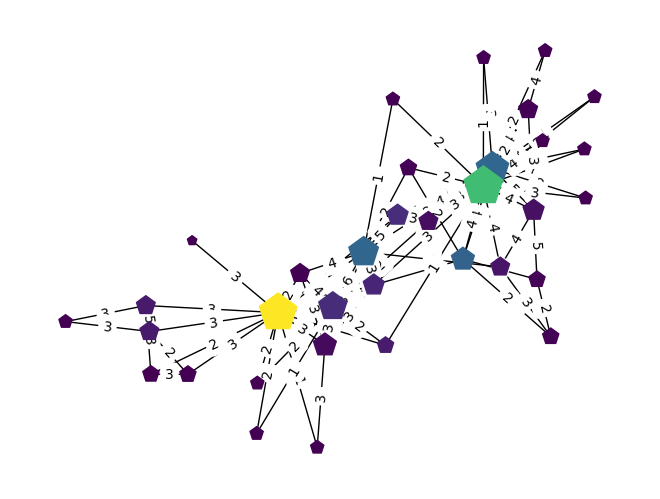

In [30]:
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        node_size=50*node_deg,
        node_shape='p') 
labels = {}
for edge in G.edges():
    labels[edge] = G.edges[edge]['weight']

nx.draw_networkx_edge_labels(G,
                             pos=fr_layout,
                             edge_labels=labels)
print('hi')

As you can see, displaying labels might not be the best option usually.

#### Edge color

You can specify edge color in a very similar way that was specified for node color. We have to specify `edge_color` in the `nx.draw()` function. We can specify one color, a list of colors, or an array of colors or values (the array has to be in the same order as the iterator `G.edges()`). When values are passed to the `edge_color` parameter, it uses `edge_cmap`, `edge_vmin` and `edge_vmax`. 

Let's try first just by giving a single color.

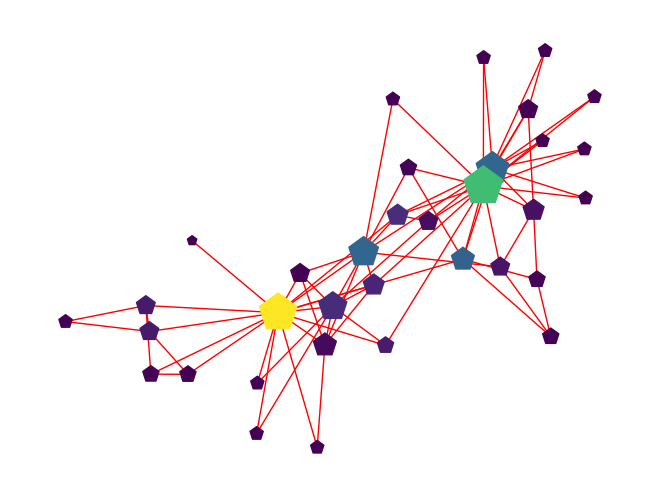

In [31]:
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        node_size=50*node_deg,
        node_shape='p',
        edge_color='r') 

Let's use now the color to display the betwenness of every edge. For a reason I don't fully understand, in order to choose a colormap for the edges you cannot directly tell the name of the colormap to the parameter `edge_cmap`, but you have to specify it as `mpl.colormaps[CMAP_NAME]`, having imported the module `matplotlib` as `mpl`.

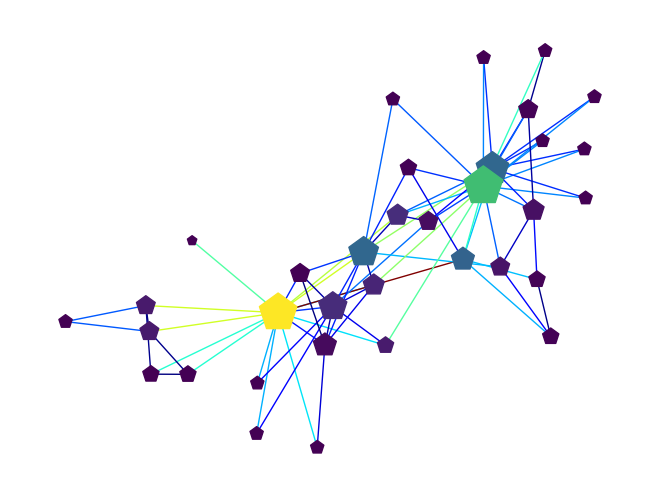

In [32]:
import matplotlib as mpl
edge_betweenness = [x for k,x in nx.edge_betweenness_centrality(G).items()]

nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        node_size=50*node_deg,
        node_shape='p',
        edge_color=edge_betweenness,
        edge_cmap=mpl.colormaps['jet']) 

#### Edge width

Now let's use the property of the edges `weight`, which tells the number of times two athletes trained together, to give the width of the edges. We will do so with the parameter `width`, which works similarly to `edge_color`.

In [33]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'weight': 3}), (0, 5, {'weight': 3}), (0, 6, {'weight': 3}), (0, 7, {'weight': 2}), (0, 8, {'weight': 2}), (0, 10, {'weight': 2}), (0, 11, {'weight': 3}), (0, 12, {'weight': 1}), (0, 13, {'weight': 3}), (0, 17, {'weight': 2}), (0, 19, {'weight': 2}), (0, 21, {'weight': 2}), (0, 31, {'weight': 2}), (1, 2, {'weight': 6}), (1, 3, {'weight': 3}), (1, 7, {'weight': 4}), (1, 13, {'weight': 5}), (1, 17, {'weight': 1}), (1, 19, {'weight': 2}), (1, 21, {'weight': 2}), (1, 30, {'weight': 2}), (2, 3, {'weight': 3}), (2, 7, {'weight': 4}), (2, 8, {'weight': 5}), (2, 9, {'weight': 1}), (2, 13, {'weight': 3}), (2, 27, {'weight': 2}), (2, 28, {'weight': 2}), (2, 32, {'weight': 2}), (3, 7, {'weight': 3}), (3, 12, {'weight': 3}), (3, 13, {'weight': 3}), (4, 6, {'weight': 2}), (4, 10, {'weight': 3}), (5, 6, {'weight': 5}), (5, 10, {'weight': 3}), (5, 16, {'weight': 3}), (6, 16, {'weight': 3}), (8, 30, {'weight': 3

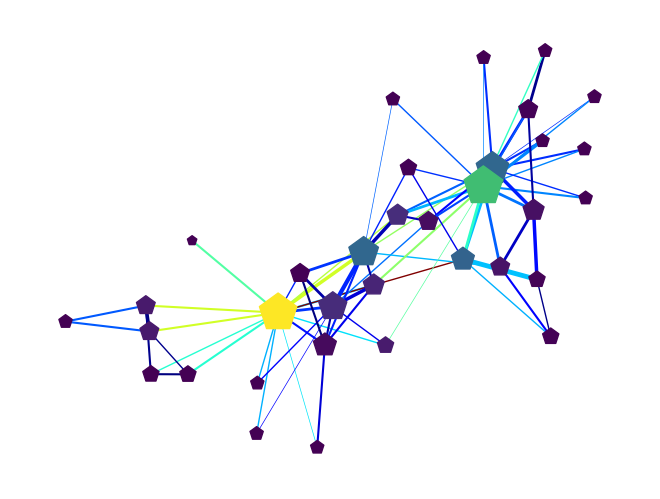

In [35]:
weights=np.array([G.edges[edge]['weight'] for edge in G.edges()])
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        node_size=50*node_deg,
        node_shape='p',
        edge_color=edge_betweenness,
        edge_cmap=mpl.colormaps['jet'],
        width=0.5*weights) 

#### Edge line style

We can change the line style of the edges using the parameter `style`, which can take the values `'-'`, `'--'`, `'-.'`, `':'`. 

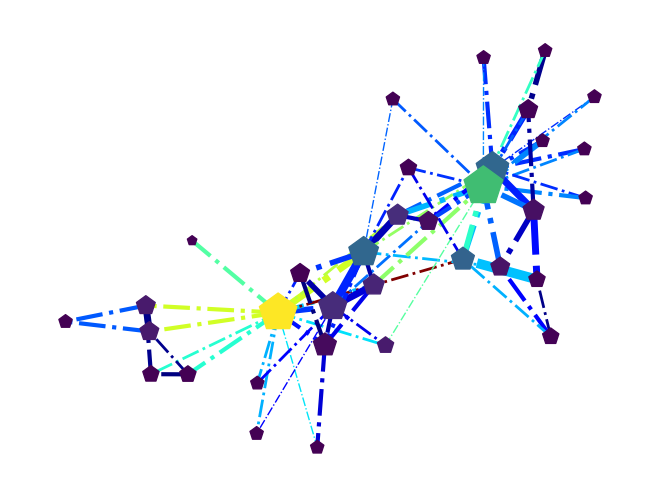

In [37]:
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        node_size=50*node_deg,
        node_shape='p',
        edge_color=edge_betweenness,
        edge_cmap=mpl.colormaps['jet'],
        width=weights,
        style='-.') 

This parameter has the same problem that had the parameter `node_shape`. There is no way of specifying different styles for different edges with just one call to the `nx.draw()` function. To this end we will use the function `nx.draw_networkx_edges()`, where you can specify the edges that you want to plot through the parameter `edgelist`.

##### Exercise

Plot the Karate club network so that you show the node betweenness as the color of the nodes, the degree as their size and belonging to one of the two clubs in the shape of the nodes. Regarding the edges, use the color to show the edge betweenness centrality, the width to show the weight and plot with different styles edges between members of Mr. Hi's club, edges between members od Officer's club and edges between members of different clubs.

Finally we can save the figure like we do usually with `matplotlib.pyplot`.

In [ ]:
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        node_size=50*node_deg,
        node_shape='p',
        edge_color=edge_betweenness,
        edge_cmap=mpl.colormaps['jet'],
        width=weights,
        style='-.') 

plt.savefig('./results/example.png',bbox_inches='tight')

### Exercise

Plot two networks of at least 50 nodes, showing at least 5 properties (for example 2 node properties and 3 edge properties) using the parameters that we have learnt. You can send the code, necessary files and output to `juanf@ifisc.uib-csic.es`.

## Visualizing networks with Cytoscape

We are now going to use a different software for visualizing networks, namely [Cytoscape](https://cytoscape.org/). This software provides a interactive GUI that lets you analyze and visualize networks in a more flexible way. Download the program from its main page and open it.

My advice is to create all the properties of nodes and edges that we want in NetworkX and the save it in a format that Cytoscape can read, like `GML`. In that way you will have access in Cytoscape to all the properties that you added to the graph with NetworkX.

In [38]:
import networkx as nx
import numpy as np

G = nx.karate_club_graph()

betweenness_dict = dict(nx.betweenness_centrality(G))
nx.set_node_attributes(G,betweenness_dict,'node_betweenness')

deg_dict = dict(nx.degree(G))
nx.set_node_attributes(G,deg_dict,'node_degree')

edge_betweenness_dict = nx.edge_betweenness_centrality(G)
nx.set_edge_attributes(G,edge_betweenness_dict,'edge_betweenness')

edge_type = dict()
for edge in G.edges():
    type_1 = G.nodes[edge[0]]['club']
    type_2 = G.nodes[edge[1]]['club']
    if type_1 == type_2:
        if type_1 == 'Mr. Hi':
            edge_type[edge] = 'Mr. Hi'
        else:
            edge_type[edge] = 'Officer'
    else:
        edge_type[edge] = 'Mixed'

nx.set_edge_attributes(G,edge_type,'edge_type')

nx.write_gml(G,'./results/karate_with_attributes.gml')

In [ ]:
G.nodes[0]['club']